In [153]:
# Visualization setup
%matplotlib inline    
from matplotlib import style 
style.use('fivethirtyeight') 
import matplotlib.pyplot as plt  

In [154]:
# Importing essential libraries for data analysis and visualization
import numpy as np          # For numerical operations and handling arrays
import pandas as pd         # For data manipulation and analysis with DataFrames
import datetime as dt       # For handling date and time data

# Reflect Tables into SQLAlchemy ORM

In [155]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [156]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [157]:
# reflect an existing database into a new model
# reflect the tables
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

C:\Users\riffa\AppData\Local\Temp\ipykernel_4784\1876733230.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [158]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [159]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [160]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [161]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print (recent_date)

2017-08-23


Text(0.5, 1.0, 'Precipitation Over the Last 12 Months')

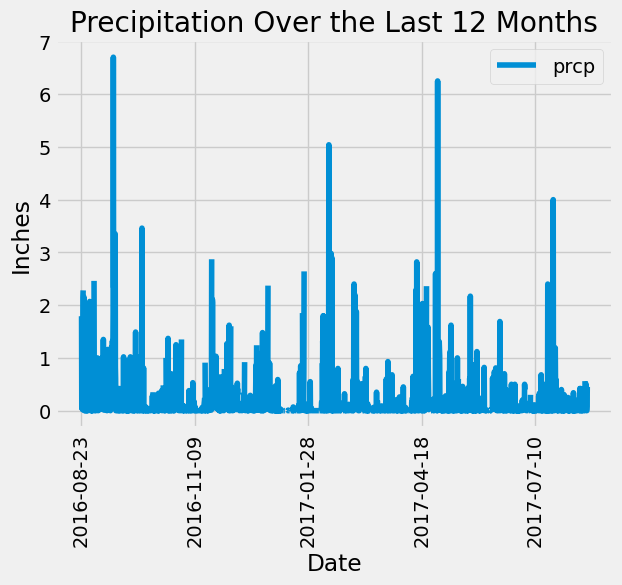

In [162]:
#Calculate the most recent date in the dataset
recent_date= session.query(func.max(Measurement.date)).first()

# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the last 12 months of precipitation data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_12_months).all()

#Load the results into a DataFrame and explicitly set column names
prcp_df = pd.DataFrame(precipitation_data, columns=["date", "prcp"])

#Convert the date column to datetime format for accurate plotting and calculation
prcp_df=prcp_df.sort_values("date")

# Plot the Bargraph
prcp_df.plot(x="date",y="prcp",rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over the Last 12 Months")

# Exploratory Precipitation Analysis:
# Objective: 
Examine the distribution of monthly precipitation levels over the past year.
## Methodology:
We aggregated the precipitation data by month and created a bar graph to show the total or average precipitation for each month.
## Insights: 
The bar graph highlights any seasonal trends, showing which months have the most and least rainfall. Peaks in certain months can indicate seasonal weather patterns, while consistently low or high months can suggest drought or wet season indicators.

In [163]:
# Assuming prcp_df is already defined and contains a 'prcp' column
prcp_summary_stats = prcp_df["prcp"].describe()

# Convert the series to a DataFrame for better display options
prcp_summary_df = prcp_summary_stats.to_frame(name='Precipitation')

# Style the DataFrame to display a neat table
prcp_summary_df.style.format("{:.4f}").set_caption("Summary Statistics for Precipitation Data")


# Exploratory Station Analysis

In [164]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [165]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Display the stations and their observation counts
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [166]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

# Query to get the lowest, highest, and average temperatures for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

# Display the temperature statistics
display(temperature_stats)

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature (°F)')


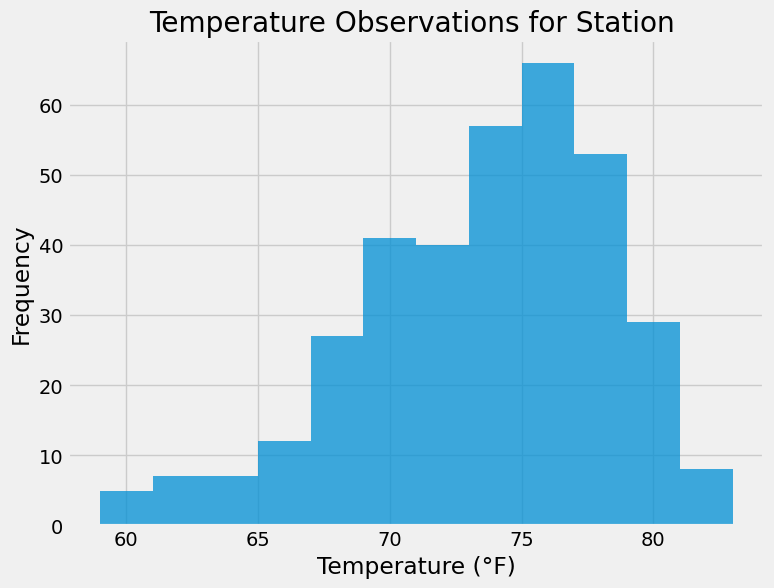

In [167]:
# Using the most active station id
# Query the last 12 months# Query for the last 12 months of temperature observation data (TOBS) for the most active station
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= last_12_months).all()

# Convert the TOBS data into a DataFrame for plotting
tobs_df = pd.DataFrame(tobs_data, columns=["tobs"])
# Plot the histogram
plt.figure(figsize=(8, 6))  # Set figure size
tobs_df["tobs"].plot.hist(bins=12, alpha=0.75, legend=False)  # Plot histogram

# Capture and print the Text object for xlabel
x_label_text = plt.xlabel("Temperature (°F)")
print(x_label_text)  

# Set other plot labels and title
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for Station ")
plt.show()

# Exploratory Station Analysis:

## Objective: 
Analyze the frequency of observations (activity) across various stations.
## Methodology:
We compiled a histogram representing the distribution of the number of observations for each station, illustrating the frequency and consistency of data collection at each location.
## Insights: 
The histogram provides a clear comparison of station activity, identifying which stations are highly active and which are less frequently used. Highly active stations may be primary data sources and thus crucial for reliable regional data analysis.

# Close Session

In [168]:
# Close Session
session.close()